In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import os, glob

In [2]:
path = os.getcwd()

In [3]:
csv_files = []
labels = []
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(root+'\\'+f)
            label = root.split('\\')[-1]
            labels.append(label)

In [4]:
#csv_files, labels

In [5]:
df = pd.read_csv('AReM/bending1/dataset1.csv', comment='#', header=None)
df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

In [6]:
df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.3
1,250,39.25,0.43,23.00,0.00,33.00,0.0
2,500,39.25,0.43,23.25,0.43,33.00,0.0
3,750,39.50,0.50,23.00,0.71,33.00,0.0
4,1000,39.50,0.50,24.00,0.00,33.00,0.0
...,...,...,...,...,...,...,...
475,118750,43.33,0.47,25.00,0.00,30.00,0.0
476,119000,43.50,0.50,25.50,0.50,30.00,0.0
477,119250,43.50,0.50,24.75,0.43,30.00,0.0
478,119500,43.50,0.50,24.33,0.47,30.00,0.0


In [7]:
df['target'] = labels[0]#*df.shape[0]
df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1
...,...,...,...,...,...,...,...,...
475,118750,43.33,0.47,25.00,0.00,30.00,0.0,bending1
476,119000,43.50,0.50,25.50,0.50,30.00,0.0,bending1
477,119250,43.50,0.50,24.75,0.43,30.00,0.0,bending1
478,119500,43.50,0.50,24.33,0.47,30.00,0.0,bending1


In [8]:
all_df = []
for i in range(len(csv_files)):
    d = pd.read_csv(csv_files[i], comment='#', header=None)
    try:
        d.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        d['target'] = labels[i] #* d.shape[0]
        all_df.append(d)
        #print(i, csv_files[i])
    except ValueError:
        d = pd.read_csv(csv_files[i], comment='#', header=None, sep=' ').iloc[:, :7]
        d.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        #print(i, csv_files[i])
        d['target'] = labels[i] #* d.shape[0]
        all_df.append(d)

In [9]:
df = pd.concat(all_df, axis=0).reset_index(drop=True)
df

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
42234,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
42235,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
42236,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
42237,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [10]:
# pandas profile reporting
pf = ProfileReport(df)
pf.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 109.82it/s]


In [11]:
df.drop(columns='time', inplace=True, axis=1)

In [12]:
df

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...
42234,31.50,1.66,12.50,3.20,14.25,4.44,walking
42235,27.33,1.25,11.33,0.94,20.00,4.00,walking
42236,37.80,7.68,14.20,2.48,17.25,0.83,walking
42237,33.75,1.30,15.75,5.21,16.50,2.69,walking


<AxesSubplot:>

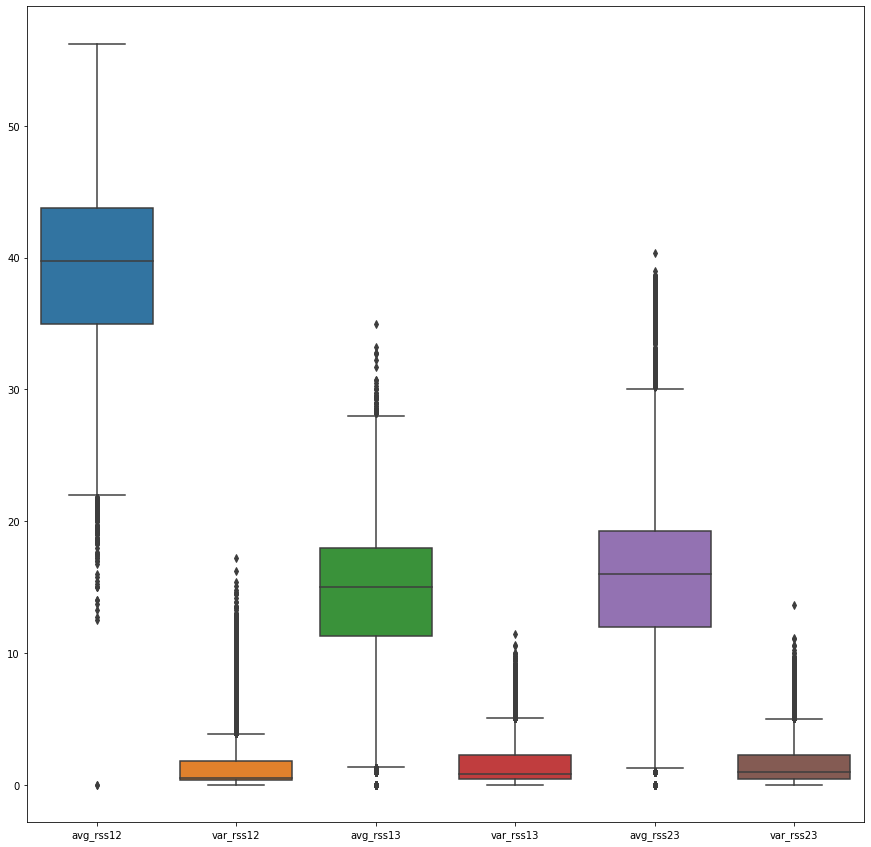

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=df, ax=ax)

In [14]:
q = df['avg_rss12'].quantile(0.70)
df_new = df[df['avg_rss12'] < q]
df_new

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...
42234,31.50,1.66,12.50,3.20,14.25,4.44,walking
42235,27.33,1.25,11.33,0.94,20.00,4.00,walking
42236,37.80,7.68,14.20,2.48,17.25,0.83,walking
42237,33.75,1.30,15.75,5.21,16.50,2.69,walking


<AxesSubplot:>

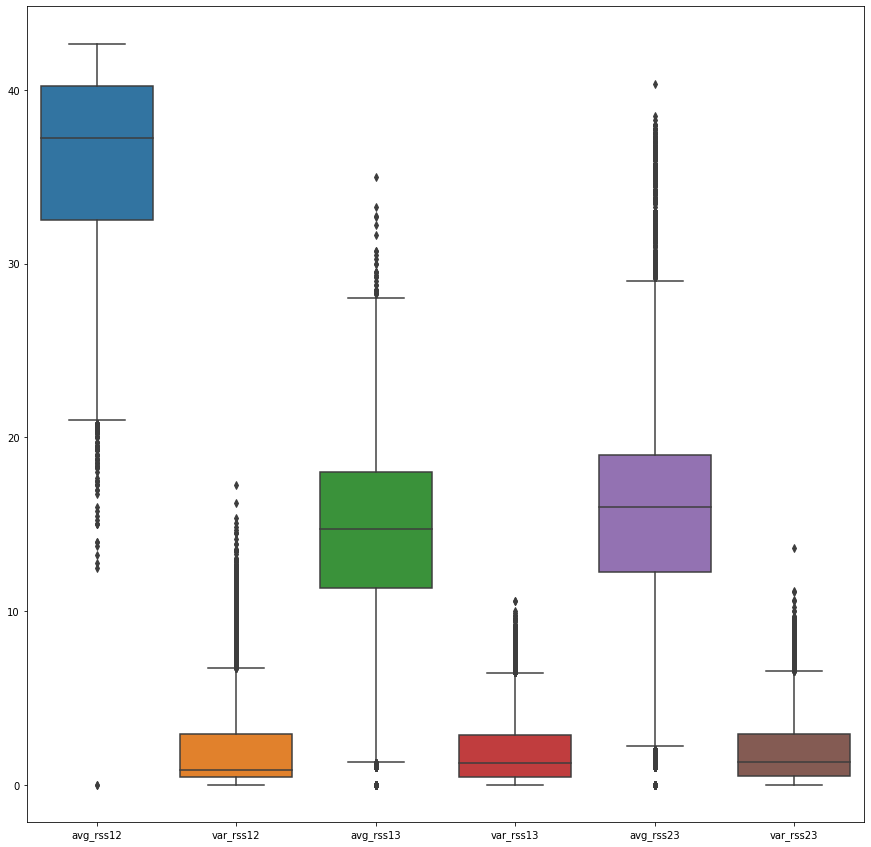

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=df_new, ax=ax)

In [16]:
#df.drop(columns='time', inplace=True)

In [17]:
q = df['avg_rss12'].quantile(0.95)
df_new = df[df['avg_rss12'] < q]

q = df_new['var_rss12'].quantile(0.98)
df_new = df_new[df_new['var_rss12'] < q]

q = df_new['avg_rss13'].quantile(0.98)
df_new = df_new[df_new['avg_rss13'] < q]

q = df_new['var_rss13'].quantile(0.99)
df_new = df_new[df_new['var_rss13'] < q]

q = df_new['avg_rss23'].quantile(0.98)
df_new = df_new[df_new['avg_rss23'] < q]

q = df_new['var_rss23'].quantile(0.98)
df_new = df_new[df_new['var_rss23'] < q]
df_new

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,39.50,0.50,23.00,0.71,33.00,0.00,bending1
7,39.00,0.00,23.75,0.43,33.00,0.00,bending1
...,...,...,...,...,...,...,...
42234,31.50,1.66,12.50,3.20,14.25,4.44,walking
42235,27.33,1.25,11.33,0.94,20.00,4.00,walking
42236,37.80,7.68,14.20,2.48,17.25,0.83,walking
42237,33.75,1.30,15.75,5.21,16.50,2.69,walking


<AxesSubplot:>

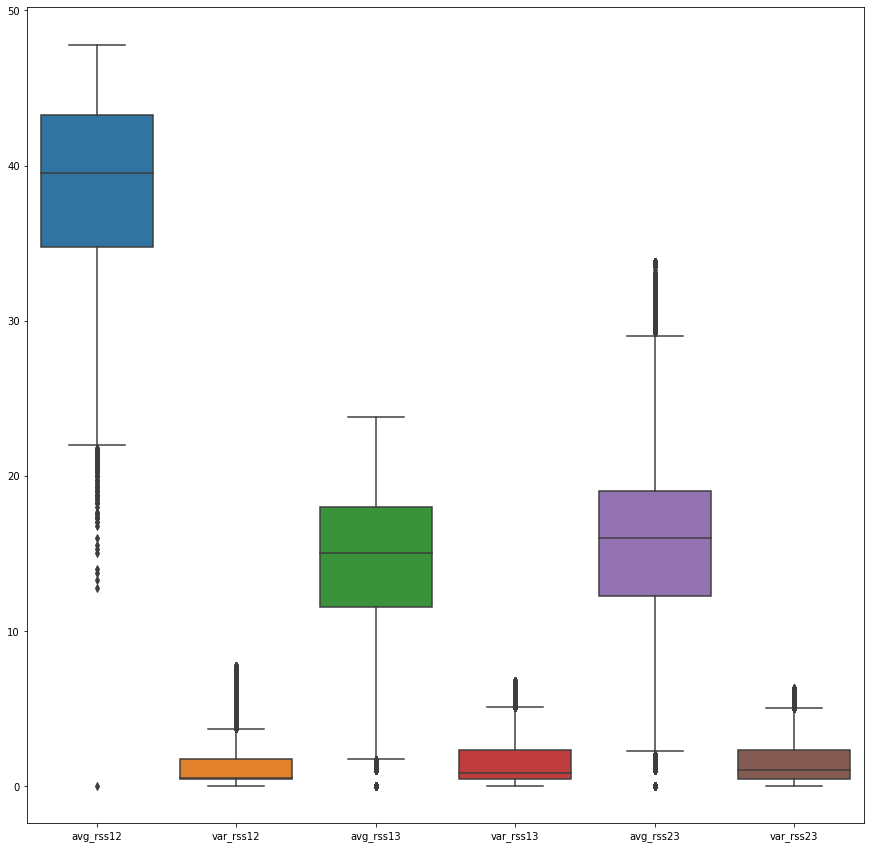

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=df_new, ax=ax)

In [19]:
#df['avg_rss12'] = df['avg_rss12'].replace(0, df['avg_rss12'].mean())

In [20]:
y = df_new['target']
x = df_new.drop(columns='target')

In [21]:
y

0        bending1
1        bending1
2        bending1
3        bending1
7        bending1
           ...   
42234     walking
42235     walking
42236     walking
42237     walking
42238     walking
Name: target, Length: 36111, dtype: object

In [22]:
x

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,39.25,0.43,22.75,0.43,33.75,1.30
1,39.25,0.43,23.00,0.00,33.00,0.00
2,39.25,0.43,23.25,0.43,33.00,0.00
3,39.50,0.50,23.00,0.71,33.00,0.00
7,39.00,0.00,23.75,0.43,33.00,0.00
...,...,...,...,...,...,...
42234,31.50,1.66,12.50,3.20,14.25,4.44
42235,27.33,1.25,11.33,0.94,20.00,4.00
42236,37.80,7.68,14.20,2.48,17.25,0.83
42237,33.75,1.30,15.75,5.21,16.50,2.69


In [23]:
scaler = StandardScaler()
arr = scaler.fit_transform(x)
arr = pd.DataFrame(arr, columns=x.columns)

<AxesSubplot:>

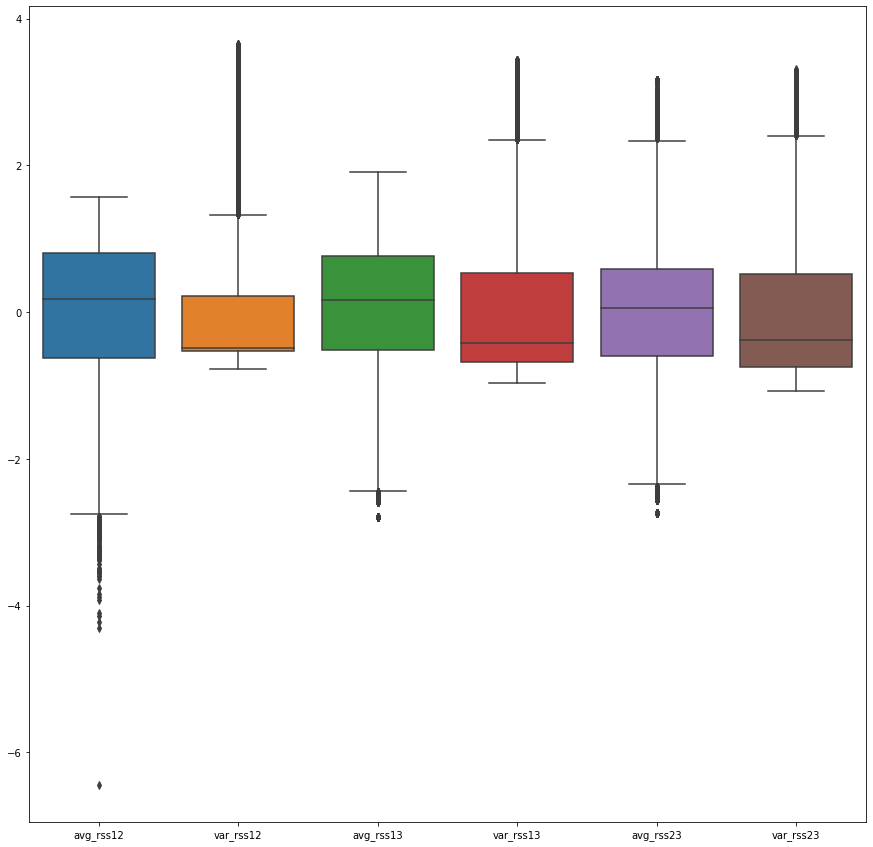

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=arr, ax=ax)

In [25]:
pf = ProfileReport(arr).to_file('report_scaled.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 119.81it/s]


In [26]:
arr

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0.134568,-0.533709,1.698254,-0.680811,3.158253,-0.165469
1,0.134568,-0.533709,1.747546,-0.960790,3.027307,-1.071222
2,0.134568,-0.533709,1.796837,-0.680811,3.027307,-1.071222
3,0.176464,-0.493489,1.747546,-0.498499,3.027307,-1.071222
4,0.092671,-0.780774,1.895421,-0.680811,3.027307,-1.071222
...,...,...,...,...,...,...
36106,-1.164229,0.173010,-0.322705,1.122776,-0.246350,2.022274
36107,-1.863065,-0.062563,-0.553391,-0.348742,0.757571,1.715712
36108,-0.108433,3.631913,0.012478,0.653974,0.277435,-0.492934
36109,-0.787159,-0.033834,0.318087,2.431516,0.146489,0.802991


In [27]:
# multicolinearity analysis
vif = pd.DataFrame()
vif['vif_score'] = [variance_inflation_factor(arr, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_score,features
0,1.149262,avg_rss12
1,1.832219,var_rss12
2,1.225120,avg_rss13
3,1.760262,var_rss13
4,1.183078,avg_rss23
5,1.785487,var_rss23


<AxesSubplot:>

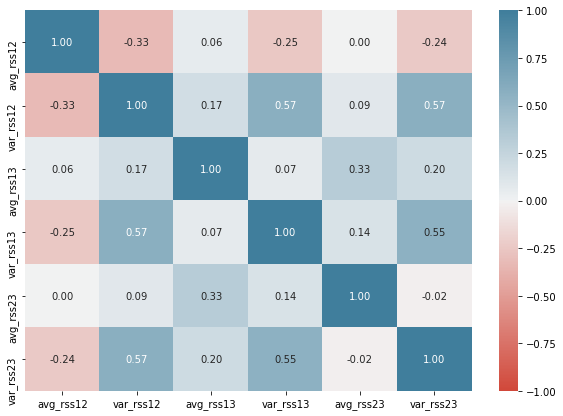

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=arr.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True, cmap=sns.diverging_palette(15,950,as_cmap=True))

In [29]:
df

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...
42234,31.50,1.66,12.50,3.20,14.25,4.44,walking
42235,27.33,1.25,11.33,0.94,20.00,4.00,walking
42236,37.80,7.68,14.20,2.48,17.25,0.83,walking
42237,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [30]:
#sns.pairplot(data=df_new, hue='target')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.25, random_state=250)

In [32]:
x_train

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
9627,0.008878,1.103811,-0.092020,1.552512,0.757571,-0.088828
10443,0.260258,0.029368,-0.092020,-0.146897,0.233786,-0.221207
20684,1.098191,-0.780774,1.402504,-0.251075,0.277435,1.095619
3080,-0.912849,-0.780774,-1.604290,-0.960790,0.844869,-0.722856
7975,-0.116812,0.247704,0.268795,2.984963,1.106761,-0.374489
...,...,...,...,...,...,...
8537,-1.638499,1.626669,-0.486354,-0.146897,0.539327,1.938666
11033,-2.198238,-0.510726,-0.486354,-0.654766,-0.115404,-1.071222
18397,1.014397,-0.493489,-0.322705,-0.394320,0.582976,-0.221207
18650,0.483148,-0.510726,0.170211,-0.960790,-1.250272,-0.290881


In [33]:
y_train

12103     cycling
12984     cycling
25287     sitting
4669     bending2
10173     cycling
           ...   
10802     cycling
13611       lying
22934     sitting
23187     sitting
31860    standing
Name: target, Length: 27083, dtype: object

In [34]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred_default = logr.predict(x_test)

In [51]:
print('The classification report for default model is:\n',classification_report(y_test, y_pred_default))
confusion_matrix(y_test, y_pred_default)

The classification report for default model is:
               precision    recall  f1-score   support

    bending1       0.77      0.71      0.74       485
    bending2       0.73      0.73      0.73       626
     cycling       0.61      0.67      0.64      1539
       lying       0.78      0.90      0.84      1304
     sitting       0.50      0.45      0.47      1760
    standing       0.66      0.69      0.68      1780
     walking       0.70      0.63      0.66      1534

    accuracy                           0.66      9028
   macro avg       0.68      0.68      0.68      9028
weighted avg       0.66      0.66      0.66      9028



array([[ 343,    0,   13,    0,  120,    9,    0],
       [  29,  454,   22,   70,   40,    0,   11],
       [   4,    7, 1025,    3,  110,   16,  374],
       [   0,   32,    2, 1168,   62,   34,    6],
       [  60,  107,   43,  184,  794,  563,    9],
       [   8,    1,   20,   64,  449, 1230,    8],
       [   0,   19,  542,    3,    9,    2,  959]], dtype=int64)

In [37]:
#solvers = LogisticRegression(solver=['newton-cg', default='lbfgs', 'sag', 'saga'])

In [52]:
newton_solver = LogisticRegression(solver='newton-cg')
newton_solver.fit(x_train, y_train)
y_pred_newton = newton_solver.predict(x_test)
print('The classification report newton-cg solver: \n', classification_report(y_test, y_pred_newton))
confusion_matrix(y_test, y_pred_newton)

The classification report newton-cg solver: 
               precision    recall  f1-score   support

    bending1       0.77      0.71      0.74       485
    bending2       0.73      0.73      0.73       626
     cycling       0.61      0.67      0.64      1539
       lying       0.78      0.89      0.84      1304
     sitting       0.50      0.45      0.47      1760
    standing       0.66      0.69      0.68      1780
     walking       0.70      0.63      0.66      1534

    accuracy                           0.66      9028
   macro avg       0.68      0.68      0.68      9028
weighted avg       0.66      0.66      0.66      9028



array([[ 343,    0,   13,    0,  120,    9,    0],
       [  29,  454,   22,   70,   40,    0,   11],
       [   4,    7, 1025,    3,  110,   16,  374],
       [   0,   32,    2, 1167,   63,   34,    6],
       [  60,  107,   43,  184,  794,  563,    9],
       [   8,    1,   20,   64,  448, 1231,    8],
       [   0,   19,  542,    3,    9,    2,  959]], dtype=int64)

In [53]:
sag_solver = LogisticRegression(solver='sag')
sag_solver.fit(x_train, y_train)
y_pred_sag = sag_solver.predict(x_test)
print('The classification report sag solver: \n', classification_report(y_test, y_pred_sag))
confusion_matrix(y_test, y_pred_sag)

The classification report sag solver: 
               precision    recall  f1-score   support

    bending1       0.77      0.71      0.74       485
    bending2       0.73      0.73      0.73       626
     cycling       0.61      0.67      0.64      1539
       lying       0.78      0.89      0.84      1304
     sitting       0.50      0.45      0.47      1760
    standing       0.66      0.69      0.68      1780
     walking       0.70      0.63      0.66      1534

    accuracy                           0.66      9028
   macro avg       0.68      0.68      0.68      9028
weighted avg       0.66      0.66      0.66      9028



array([[ 343,    0,   13,    0,  120,    9,    0],
       [  29,  454,   22,   70,   40,    0,   11],
       [   4,    7, 1025,    3,  110,   16,  374],
       [   0,   32,    2, 1167,   63,   34,    6],
       [  60,  107,   43,  184,  794,  563,    9],
       [   8,    1,   20,   64,  448, 1231,    8],
       [   0,   19,  542,    3,    9,    2,  959]], dtype=int64)

In [54]:
saga_solver = LogisticRegression(solver='saga')
saga_solver.fit(x_train, y_train)
y_pred_saga = saga_solver.predict(x_test)
print('The classification report saga solver: \n', classification_report(y_test, y_pred_saga))
confusion_matrix(y_test, y_pred_saga)

The classification report saga solver: 
               precision    recall  f1-score   support

    bending1       0.77      0.71      0.74       485
    bending2       0.73      0.73      0.73       626
     cycling       0.62      0.67      0.64      1539
       lying       0.78      0.89      0.84      1304
     sitting       0.50      0.45      0.47      1760
    standing       0.66      0.69      0.68      1780
     walking       0.70      0.63      0.66      1534

    accuracy                           0.66      9028
   macro avg       0.68      0.68      0.68      9028
weighted avg       0.66      0.66      0.66      9028



array([[ 343,    0,   13,    0,  120,    9,    0],
       [  29,  454,   22,   70,   40,    0,   11],
       [   4,    7, 1026,    3,  110,   16,  373],
       [   0,   32,    2, 1167,   63,   34,    6],
       [  60,  107,   43,  184,  794,  563,    9],
       [   8,    1,   20,   64,  448, 1231,    8],
       [   0,   19,  542,    3,    9,    2,  959]], dtype=int64)

In [41]:
df.head(5)

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [42]:
test = [['39.25', '0.43', '22.75', '0.43', '33.75', '1.3']]
scale_test = scaler.transform(test)

In [43]:
logr.predict(scale_test)[0]

'bending1'

In [44]:
test = [['39.25', '0.43', '23', '0.00', '33', '0']]
scale_test = scaler.transform(test)
logr.predict(scale_test)[0]

'bending1'

In [45]:
df.iloc[20000:20005, :]

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,target
20000,39.50,0.50,4.67,0.47,17.67,0.47,lying
20001,39.25,0.43,5.50,0.50,17.75,0.43,lying
20002,39.67,0.47,4.75,0.43,18.00,0.00,lying
20003,39.33,0.47,5.00,0.00,18.00,0.00,lying
20004,39.00,0.00,5.67,0.94,17.75,0.43,lying


In [46]:
test = [['39.67',	'0.47',	'4.75',	'0.43',	'18.00',	'0.00']]
scale_test = scaler.transform(test)
logr.predict(scale_test)[0]

'lying'

In [47]:
scale_test

array([[ 0.20495405, -0.51072637, -1.85074809, -0.68081077,  0.40838112,
        -1.07122234]])

In [48]:
test = [[39.00,	0.00,	5.67,	0.94,	17.75,	0.43]]
scale_test = scaler.transform(test)
logr.predict(scale_test)[0]

'sitting'

In [49]:
test = [[39.67,	0.47,	4.75,	0.43,	18.00,	0.00]]
scale_test = scaler.transform(test)
logr.predict(scale_test)[0]

'lying'